In [10]:
import numpy as np
import collections
import seaborn as sns
import pandas as pd
import cv2
from numpy import load
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x_test=load('final_data/split/x_test.npy')
y_test=load('final_data/split/y_test.npy')

In [4]:
# 모델성능평가
def model_predict(model,x_test,y_test,title):
  #불러온모델로 x_test 평가
  y_pred = model.predict(x_test, batch_size=1, verbose=0)


  #argmax()평가된 결과값 도출
  y_pred_lis = []
  for i in range(len(y_pred)):
    y_pred_lis.append(np.argmax(y_pred[i]))
  #정확도 측정
  accuracy_score(y_test, y_pred_lis)
  accuracy_result = accuracy_score(y_test, y_pred_lis)

  print('정확도: %.4f%%'%accuracy_score(y_test, y_pred_lis))
  
  conf_matrix=confusion_matrix(y_test, y_pred_lis, labels=[0,1,2,3], normalize='true')
  df=pd.DataFrame(conf_matrix,columns=["Happy_pred","Angry_pred","Sad_pred","Neutral_pred"], index=["Happy","Angry","Sad","Neutral"])

  conf_mat= sns.heatmap(df,annot=True, 
            linewidths=.5,
            cbar=False,
            #cmap='coolwarm',
            cmap="Blues",
            #cmap="BuPu"
            )

  plt.title(title)
  #return accuracy_result, conf_mat

정확도: 0.6282%


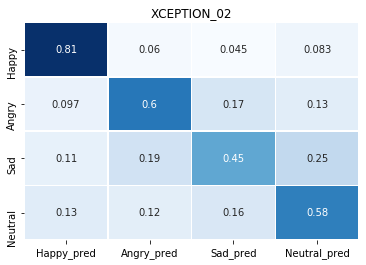

In [11]:
model = tf.keras.models.load_model("models/_big_XCEPTION2_23-0.60-1.6831.hdf5")
model_predict(model,x_test, y_test,"XCEPTION_02")

정확도: 0.6952%


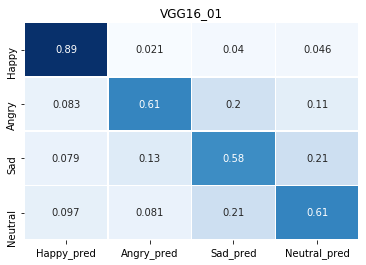

In [13]:
model_01 = tf.keras.models.load_model("models/_littleVGG16_.14-0.68-1.5656.h5")
model_predict(model_01,x_test, y_test,"VGG16_01")